## downsampling bug in a low resolution toy model

#### umo and vmo are transport quantities (Kg/s) and the downsampled value at each coarse cell should be almost twice the value at the original fine cell. But that is not the case in these model runs and it looks like umo and vmo are treated as fluxes and not as transport when they are downsampled. There must a bug causing this!

In [1]:
import numpy as np
import netCDF4 as nc
import imp  
#import ocean_grid_generator as ogg
import matplotlib.pyplot as plt
%matplotlib inline
import math
import numpy as np
import cmocean
import cmocean.cm as cmo

dataset_p125 = nc.Dataset('/net2/nnz/platforms/mom6/exps/mom6_sis2/19000101.ocean_daily_prefix.nc')
#for var in dataset.variables: print(var,end=' ')
#xh yh z_l z_i time nv xq yq volcello thetao thetao_xyave so so_xyave obvfsq umo vmo time_bnds average_T1 average_T2 average_DT
umo_p125 = dataset_p125.variables['umo']
vmo_p125 = dataset_p125.variables['vmo']
uo_p125 = dataset_p125.variables['uo']
vo_p125 = dataset_p125.variables['vo']
vol_p125 = dataset_p125.variables['volcello']
xh_p125  = dataset_p125.variables['xh']
yh_p125  = dataset_p125.variables['yh']
print(umo_p125.shape,xh_p125.shape,yh_p125.shape)
time = dataset_p125.variables['time'] 
print(nc.num2date(time[0],time.units)) #1960-07-02 00:00:00

dataset_p125_d2= nc.Dataset('/net2/nnz/platforms/mom6/exps/mom6_sis2/19000101.ocean_daily_d2_prefix.nc')
umo_p125_d2 = dataset_p125_d2.variables['umo']
vmo_p125_d2 = dataset_p125_d2.variables['vmo']
uo_p125_d2 = dataset_p125_d2.variables['uo']
vo_p125_d2 = dataset_p125_d2.variables['vo']
vol_p125_d2 = dataset_p125_d2.variables['volcello']
xh_p125_d2 = dataset_p125_d2.variables['xh']
yh_p125_d2 = dataset_p125_d2.variables['yh']
print(umo_p125_d2.shape,xh_p125_d2.shape,yh_p125_d2.shape)
time = dataset_p125.variables['time'] 
print(nc.num2date(time[0],time.units)) #1960-07-02 00:00:00

(2, 75, 144, 180) (180,) (144,)
1900-01-01 12:00:00
(2, 75, 72, 90) (90,) (72,)
1900-01-01 12:00:00


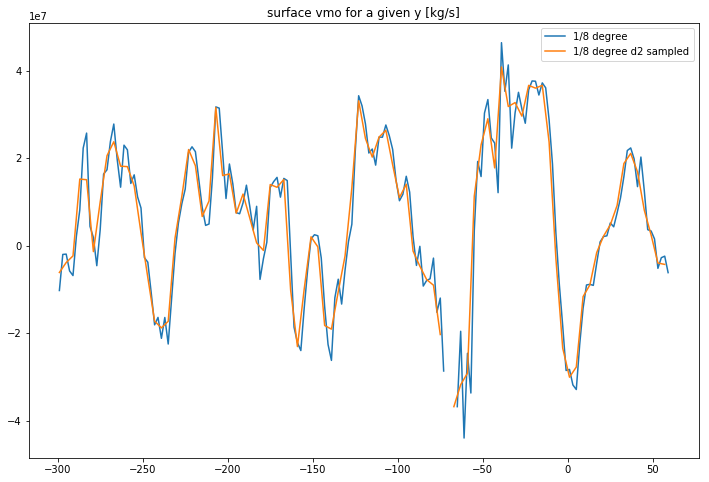

In [9]:
plt.figure(figsize=(12,8))
plt.title('surface vmo for a given y [kg/s]'); 
plt.plot(xh_p125,vmo_p125[0,0,40,:],label='1/8 degree')
plt.plot(xh_p125_d2,vmo_p125_d2[0,0,20,:],label='1/8 degree d2 sampled')

plt.legend();

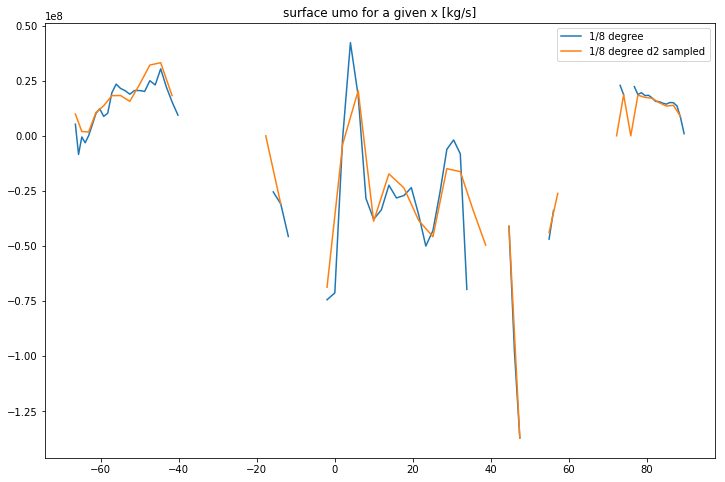

In [10]:
plt.figure(figsize=(12,8))
plt.title('surface umo for a given x [kg/s]'); 
plt.plot(yh_p125,vmo_p125[0,0,:,40],label='1/8 degree')
plt.plot(yh_p125_d2,vmo_p125_d2[0,0,:,20],label='1/8 degree d2 sampled')

plt.legend();

### Another way to see this is to look at the sum of vmo (or umo) over y (or x). The downsampled sum should equal the original sum because these are transport (Kg/s). But it looks like the latter is almost half of the former (as if these were fluxes).

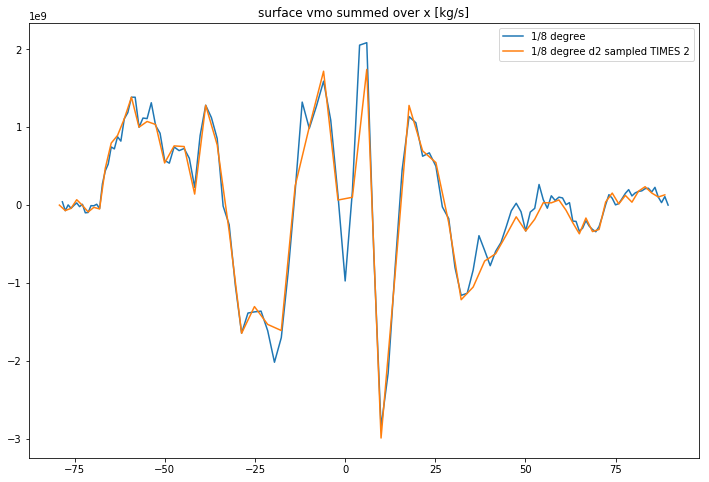

In [8]:
plt.figure(figsize=(12,8))
vmosum_p125 = np.sum(vmo_p125[0,0],axis=1)
vmosum_p125_d2 = np.sum(vmo_p125_d2[0,0],axis=1)

plt.title('surface vmo summed over x [kg/s]'); 
plt.plot(yh_p125,vmosum_p125,label='1/8 degree')
plt.plot(yh_p125_d2,2*vmosum_p125_d2,label='1/8 degree d2 sampled TIMES 2')

plt.legend();

### SSS quantities (e.g.,  grid cell volume) also show the symptoms. These quantities are supposed to be summed on 4 fine cells when downsampling to a coarser cell, so the downsampled  diagnostics is supposed to be almost 4 times of the original.  Here we see it is not so, they are almost equal, which points to  a bug in making averaged rather than sums.

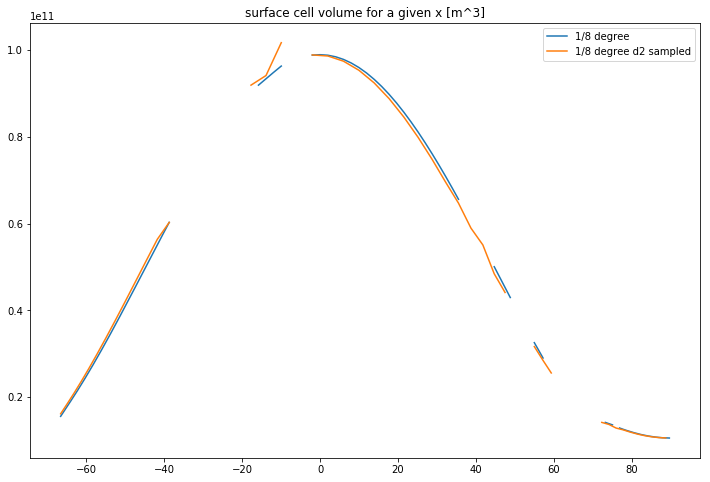

In [7]:
plt.figure(figsize=(12,8))
plt.title('surface cell volume for a given x [m^3]'); 
plt.plot(yh_p125,vol_p125[0,0,:,40],label='1/8 degree')
plt.plot(yh_p125_d2,vol_p125_d2[0,0,:,20],label='1/8 degree d2 sampled')
plt.legend();

### Non-transport quantities look fine.

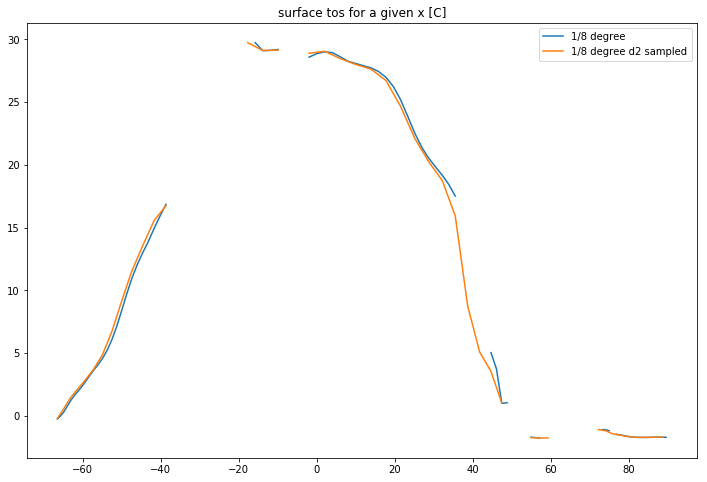

In [6]:
tos_p125 = dataset_p125.variables['tos']
tos_p125_d2 = dataset_p125_d2.variables['tos']

plt.figure(figsize=(12,8))
plt.title('surface tos for a given x [C]'); 
plt.plot(yh_p125,tos_p125[0,:,40],label='1/8 degree')
plt.plot(yh_p125_d2,tos_p125_d2[0,:,20],label='1/8 degree d2 sampled')
plt.legend();